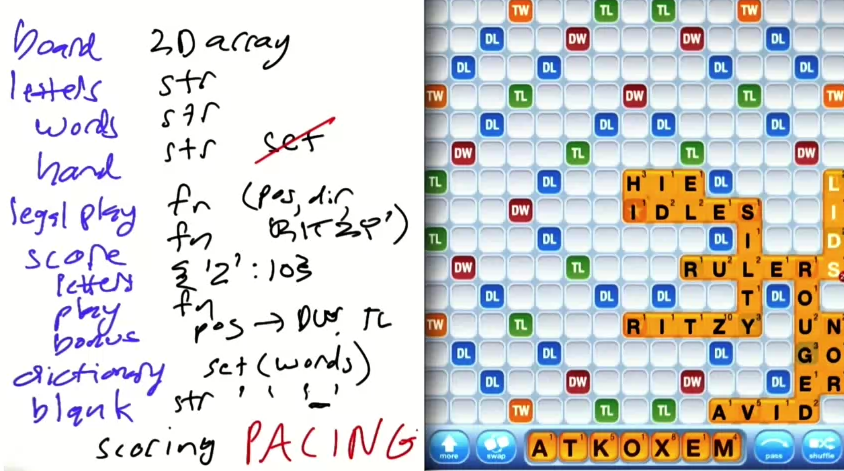

In [2]:
DIC = open('words4k.txt').read().split()
DIC

['AA',
 'AAH',
 'AAL',
 'AAS',
 'AB',
 'ABA',
 'ABILITY',
 'ABLE',
 'ABO',
 'ABOUT',
 'ABOVE',
 'ABS',
 'ABSENCE',
 'ABY',
 'ACCEPT',
 'ACCORD',
 'ACCORDING',
 'ACCOUNT',
 'ACCUSE',
 'ACE',
 'ACHIEVEMENT',
 'ACROSS',
 'ACT',
 'ACTION',
 'ACTIONS',
 'ACTIVE',
 'ACTIVITY',
 'ACTUAL',
 'ACTUALLY',
 'AD',
 'ADD',
 'ADDITION',
 'ADDITIONAL',
 'ADDRESS',
 'ADENINES',
 'ADENITIS',
 'ADEQUATE',
 'ADMINISTRATION',
 'ADMIRE',
 'ADO',
 'ADOPT',
 'ADS',
 'ADVANCE',
 'ADVANTAGE',
 'ADVENTURE',
 'ADVERTISE',
 'ADVISE',
 'ADZ',
 'AE',
 'AFF',
 'AFFAIRS',
 'AFRAID',
 'AFT',
 'AFTER',
 'AFTERNOON',
 'AG',
 'AGA',
 'AGAIN',
 'AGAINST',
 'AGE',
 'AGENCY',
 'AGO',
 'AGREE',
 'AGREEMENT',
 'AH',
 'AHA',
 'AHEAD',
 'AI',
 'AID',
 'AIL',
 'AIM',
 'AIN',
 'AIR',
 'AIRCRAFT',
 'AIRDATES',
 'AIRINESS',
 'AIS',
 'AIT',
 'AL',
 'ALA',
 'ALB',
 'ALE',
 'ALIVE',
 'ALL',
 'ALLOW',
 'ALLOWANCE',
 'ALLOWED',
 'ALMOST',
 'ALONE',
 'ALONG',
 'ALP',
 'ALREADY',
 'ALS',
 'ALSO',
 'ALT',
 'ALTHOUGH',
 'ALWAYS',
 'AM',
 'AM

In [5]:
"""
AA
BB
""".split()

['AA', 'BB']